# Data 620 - Simple Two-Mode Network

## Week 3 Assign 2 

## Group 6: Alice Friedman, Stephen Jones, Jeffrey Littlejohn, Jun Pan

## Due: 6/19/19

### Presentation Link: https://www.youtube.com/embed/NKHxi8AiOc8

### Assignment Detail:

The [Davis Southern Club women](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis) is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events.

DATASET: [DAVIS](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/davis.dat)

DESCRIPTION: One 18×14 matrix, binary.

BACKGROUND: These data were collected by Davis et al in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise.

What can you infer about the relationships between (1) the women, and (2) the social events?

In [2]:
# Import modules
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import numpy as np
from scipy import stats
from pylab import rcParams
import math
%matplotlib inline

###Data and Graphs

The Davis Southern Club Women data set was collected by Davis et al. in the 1930s. This data set is also included with the NetworkX package and comes as a bipartite graph (clubs, women) with event attendance data. Let's load it.

In [3]:
#load from the networkx package
G = nx.davis_southern_women_graph()

In [4]:
#verify type
type(G)

networkx.classes.graph.Graph

Given the dataset's small size, let's look at some details, starting with nodes.

In [5]:
G.nodes()

NodeView(('Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14'))

We see the 2 modes - women and events.

Now, let's look at edges, which represent a woman's attendance at an event.

In [5]:
G.edges()

EdgeView([('Evelyn Jefferson', 'E1'), ('Evelyn Jefferson', 'E2'), ('Evelyn Jefferson', 'E3'), ('Evelyn Jefferson', 'E4'), ('Evelyn Jefferson', 'E5'), ('Evelyn Jefferson', 'E6'), ('Evelyn Jefferson', 'E8'), ('Evelyn Jefferson', 'E9'), ('Laura Mandeville', 'E1'), ('Laura Mandeville', 'E2'), ('Laura Mandeville', 'E3'), ('Laura Mandeville', 'E5'), ('Laura Mandeville', 'E6'), ('Laura Mandeville', 'E7'), ('Laura Mandeville', 'E8'), ('Theresa Anderson', 'E2'), ('Theresa Anderson', 'E3'), ('Theresa Anderson', 'E4'), ('Theresa Anderson', 'E5'), ('Theresa Anderson', 'E6'), ('Theresa Anderson', 'E7'), ('Theresa Anderson', 'E8'), ('Theresa Anderson', 'E9'), ('Brenda Rogers', 'E1'), ('Brenda Rogers', 'E3'), ('Brenda Rogers', 'E4'), ('Brenda Rogers', 'E5'), ('Brenda Rogers', 'E6'), ('Brenda Rogers', 'E7'), ('Brenda Rogers', 'E8'), ('Charlotte McDowd', 'E3'), ('Charlotte McDowd', 'E4'), ('Charlotte McDowd', 'E5'), ('Charlotte McDowd', 'E7'), ('Frances Anderson', 'E3'), ('Frances Anderson', 'E5'), ('F

Calling info will give us a total number of nodes (number of women plus number of events) and edges (total number of attendees at all events). We also get average degree, which, in this 2-mode dataset, is a mix of average events attended by women and average number of women at events.

In [6]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 32\nNumber of edges: 89\nAverage degree:   5.5625'

Let's visualize the 2-mode network, using nodelist to distinguish between women and events.

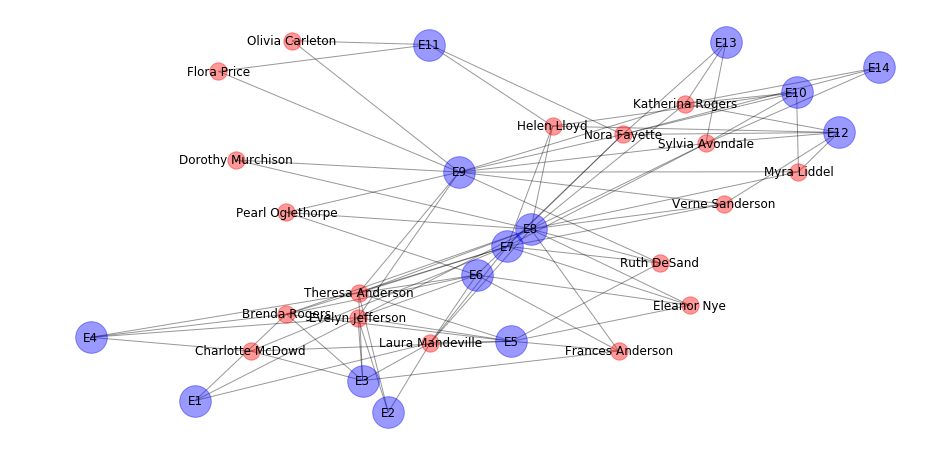

In [10]:
# Visualize the 2-mode networks
women, events = nx.bipartite.sets(G)
plt.rcParams["figure.figsize"] = (16,8)
plt.axis('off')
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=women, node_color='red', alpha = 0.4)
nx.draw_networkx_nodes(G, pos, nodelist=events, node_color='blue', alpha = 0.4, node_size = 1000)
nx.draw_networkx_edges(G, pos, alpha = 0.4)
nx.draw_networkx_labels(G, pos);

The fourteen events and the eighteen women have various connections. From the above, you can tell that, among the events, the seventh, eighth, and ninth events had the most participants.  Among women, Evelynn Jefferson, Theresa Anderson, and Nora Fayette attended the most events. We'll see this calculated using networkx distance measures next.

Looking at the graph, you can there are at least two distinct cliques, each of which had four events that were attended almost only by those cliques. And there are a handful of events attended by women from both cliques and women who do not appear to belong to either of the clear cliques. We'll look more at these later.

Now, back to the distance measures.

In [8]:
# Distance Metrics
print('center =', nx.center(G))
print('diameter =', nx.diameter(G))
print('radius =', nx.radius(G))

center = ['Evelyn Jefferson', 'Theresa Anderson', 'Ruth DeSand', 'Verne Sanderson', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'E6', 'E7', 'E8', 'E9']
diameter = 4
radius = 3


The eccentricity of a node is the maximum distance between a node to all other nodes in a graph. The radius is the minimum eccentricity in a graph - nodes with eccentricities equal to the radius constitute the "center" of the graph. In this case, they're the women who attended many events and events attended by many women.

A diameter of 4 is the shortest path between the furthest away nodes in the graph. Note that this is only one more node than the radius, which reveals just how small and interconnected this dataset is. 

In [11]:
list(G.degree())

[('Evelyn Jefferson', 8),
 ('Laura Mandeville', 7),
 ('Theresa Anderson', 8),
 ('Brenda Rogers', 7),
 ('Charlotte McDowd', 4),
 ('Frances Anderson', 4),
 ('Eleanor Nye', 4),
 ('Pearl Oglethorpe', 3),
 ('Ruth DeSand', 4),
 ('Verne Sanderson', 4),
 ('Myra Liddel', 4),
 ('Katherina Rogers', 6),
 ('Sylvia Avondale', 7),
 ('Nora Fayette', 8),
 ('Helen Lloyd', 5),
 ('Dorothy Murchison', 2),
 ('Olivia Carleton', 2),
 ('Flora Price', 2),
 ('E1', 3),
 ('E2', 3),
 ('E3', 6),
 ('E4', 4),
 ('E5', 8),
 ('E6', 8),
 ('E7', 10),
 ('E8', 14),
 ('E9', 12),
 ('E10', 5),
 ('E11', 4),
 ('E12', 6),
 ('E13', 3),
 ('E14', 3)]

In this case, degrees represent the number of events a woman attended.

Let's create a bipartite graph focused on the women nodes, which basically removes the events. If a woman attended an event with another, we're going to call them friends below. 

###Bipartite graphs

In [12]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w),w))


#Friends, Member
17 Evelyn Jefferson
16 Myra Liddel
16 Pearl Oglethorpe
12 Olivia Carleton
17 Nora Fayette
15 Frances Anderson
17 Ruth DeSand
17 Theresa Anderson
17 Sylvia Avondale
16 Katherina Rogers
16 Dorothy Murchison
12 Flora Price
11 Charlotte McDowd
15 Brenda Rogers
15 Eleanor Nye
15 Laura Mandeville
17 Helen Lloyd
17 Verne Sanderson


Charlotte McDowd, who appears in the lower left clique in our original 2-mode visualization, has only 11 "friends," which matches what we saw.

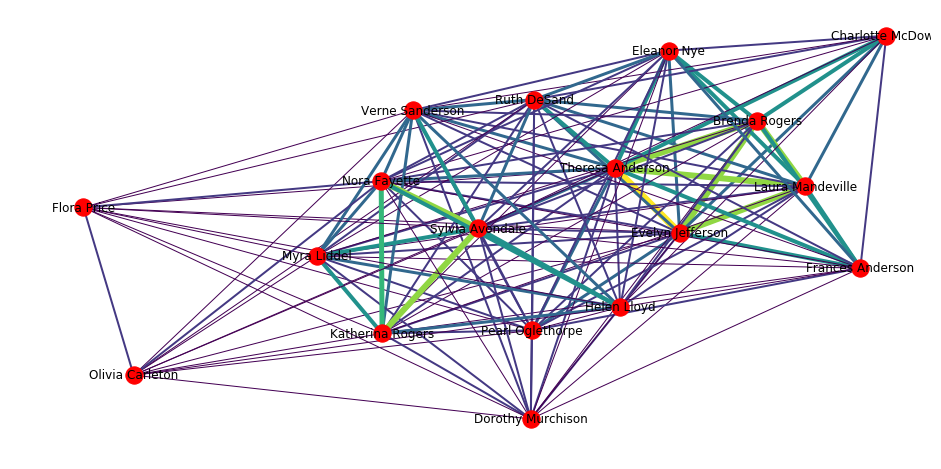

In [22]:
# Above data shows the number of friends each woman has.  The following shows the detialed relationship amoung this group.
women = G.graph['top']
W = bipartite.weighted_projected_graph(G, women,ratio=False)
weights = [edata['weight'] for f,t,edata in W.edges(data=True)]
plt.rcParams["figure.figsize"] = (16,8)
nx.draw_networkx(W, k=0.1,iterations=20, width=weights, edge_color=weights)
plt.axis('off')
plt.show()

In [23]:
# Summary statics for women-only node network
print(nx.info(W))

Name: 
Type: Graph
Number of nodes: 18
Number of edges: 139
Average degree:  15.4444


In [24]:
#Find Women Cliques
list(nx.find_cliques(W))

[['Evelyn Jefferson',
  'Nora Fayette',
  'Verne Sanderson',
  'Ruth DeSand',
  'Theresa Anderson',
  'Helen Lloyd',
  'Sylvia Avondale',
  'Charlotte McDowd',
  'Brenda Rogers',
  'Eleanor Nye',
  'Laura Mandeville',
  'Frances Anderson'],
 ['Evelyn Jefferson',
  'Nora Fayette',
  'Verne Sanderson',
  'Ruth DeSand',
  'Theresa Anderson',
  'Helen Lloyd',
  'Sylvia Avondale',
  'Myra Liddel',
  'Pearl Oglethorpe',
  'Dorothy Murchison',
  'Katherina Rogers',
  'Flora Price',
  'Olivia Carleton'],
 ['Evelyn Jefferson',
  'Nora Fayette',
  'Verne Sanderson',
  'Ruth DeSand',
  'Theresa Anderson',
  'Helen Lloyd',
  'Sylvia Avondale',
  'Myra Liddel',
  'Pearl Oglethorpe',
  'Dorothy Murchison',
  'Katherina Rogers',
  'Frances Anderson',
  'Brenda Rogers',
  'Eleanor Nye',
  'Laura Mandeville']]

Removing the events from the dataset, we see two cliques, though they are larger than we might have drawn when looking at the two-node graph.

###Relationships Between the Social Events

Here, we repeat the bipartite steps to isolate events.

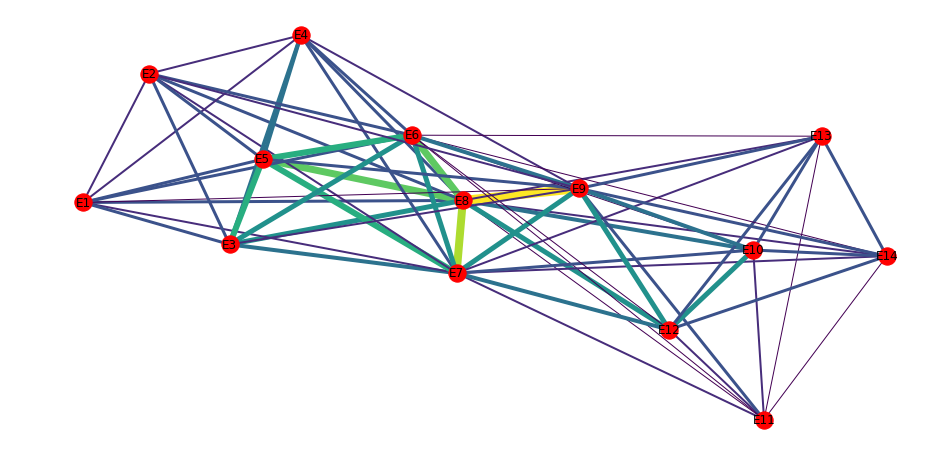

In [25]:
eventss = G.graph['bottom']
E = bipartite.weighted_projected_graph(G, events,ratio=False)
weights = [edata['weight'] for f,t,edata in E.edges(data=True)]
plt.rcParams["figure.figsize"] = (16,8)
nx.draw_networkx(E, width=weights, edge_color=weights)
plt.axis('off')
plt.show()

In [26]:
#Summary of statistics for Events
print(nx.info(E))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 66
Average degree:   9.4286


In [28]:
# Events degree centrality (number of women attend the events)
d_E = E.degree(E)
pd.DataFrame(d_E, columns=["Social Events", "Degree"])

,Social Events,Degree
0,E8,13
1,E11,8
2,E7,13
3,E1,8
4,E4,8
5,E5,8
6,E12,8
7,E14,8
8,E10,8
9,E6,13


### Conclusion

This small, simple dataset allowed us to explore two-mode graphs.